In [1]:
import numpy as np
import matplotlib.pyplot as plt
from bosonStar import *
from util import *

from ctypes import *
file = "./testing.so"
my_func = CDLL(file)

massInCU = 2e-77
aInCU = 1e-73
#Middle
#massInCU = 2e-77
#aInCU = 1e-73
totalMassInCU = 0.1
dtInCU = 20000.0
bigT = 4000

/home/kklee/anaconda3/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1256601045626D+02   r2 =  0.4412121868031D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1256601045626D+02   r2 =  0.4412121868031D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1256601045626D+02   r2 =  0.4412121868031D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1256601045626D+02   r2 =  0.4412121868031D-15
 lsoda--  warning..internal t (=r1) 

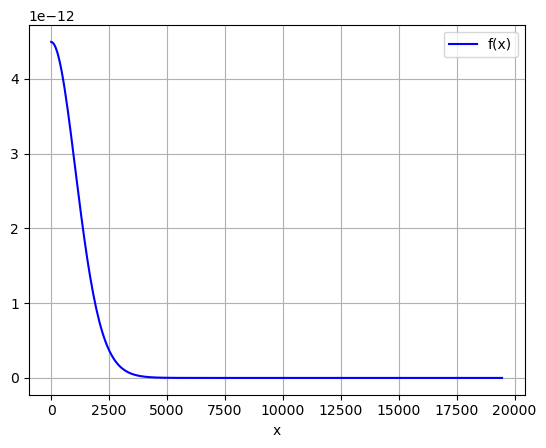

In [2]:
allThings = outputProfile(massInCU, aInCU, totalMassInCU)
#Hot Fix
x = allThings["x"][1::2]
psi = allThings["profile"][1::2]

In [3]:
totalMass = massSIToPlanckUnit(massCodeUnitToSI(totalMassInCU))
m = massSIToPlanckUnit(massCodeUnitToSI(massInCU))
a = lengthSIToPlanckUnit(lengthCodeUnitToSI(aInCU))
N = totalMass/m

In [4]:
HBAR = 1.0
G = 1.0
c = 1.0

In [5]:
Ra = np.sqrt(a/m/m/m)
omegaA = m*m/np.abs(a)
epsilon = 1.0/omegaA/m/Ra/Ra
a0 = np.sqrt(1.0/omegaA/m)
delta = 4.0*np.pi*a*N/a0
GM = totalMass/Ra/Ra/Ra/omegaA/omegaA

print("R:", Ra)
print("Omega:" ,omegaA)
print("Epsilon (Should be 1):", epsilon)
print("Delta:", delta)
print("New G:", GM)

R: 3.8684718785837514e+40
Omega: 3.656129092998465e-43
Epsilon (Should be 1): 1.0000000000000002
Delta: 14.839459489461666
New G: 1.180886665279879


In [6]:
x = lengthSIToPlanckUnit(lengthCodeUnitToSI(x))/Ra
x = np.concatenate((np.flip(-x), x))

psi = np.sqrt(densitySIToPlanckUnit(densityCodeUnitToSI(psi))/totalMass)*np.power(Ra, 3.0/2.0)
psi = np.concatenate((np.flip(psi), psi))
normalization = np.trapz(2.0*np.pi*x*x*np.absolute(psi)*np.absolute(psi), x)
psi = psi/normalization
psi = psi.astype(complex)

for index, value in enumerate(psi):
    if(value<1e-8):
        psi[index] = 0
psi = psi.astype(complex)

size = len(psi)
dt = timeSIToPlanckUnit(timeCodeUnitToSI(dtInCU))*omegaA

print(psi)
print(dt)

[0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+0

In [7]:
dx = x[1]-x[0]
T = np.zeros((size,size))
TSph = np.zeros((size,size))
V = np.zeros((size,size))
Q = np.zeros((size,size))
V2Grav = np.zeros((size,size))
I = np.identity(size)
I = I.astype(complex)

phi = -np.exp(-x*x)/1000.0
phi[0] = 0.0
phi[size-1] = 0.0

In [8]:
def setupT():
    global T, TSph
    for i in range(size):
        T[i][i] = -2.0
        if(i!=size-1):
            T[i][i+1] = 1.0
            TSph[i][i+1] = 1.0/2.0/x[i]
        if(i!=0):
            T[i][i-1] = 1.0
            TSph[i][i-1] = -1.0/2.0/x[i]

    T = -1.0/2.0/dx/dx*T
    TSph = -1.0/dx*TSph
    T = T.astype(complex)
    TSph = TSph.astype(complex)

def setupQ():
    global Q
    for i in range(size):
        if(np.absolute(psi[i]) >= 1e-8):
            Q[i][i] = delta*np.absolute(psi[i])*np.absolute(psi[i])

    Q = Q.astype(complex)

def setupV2Grav():
    global V2Grav, phi, psi

    '''
    phi[0] = 0.0
    phi[size-1] = 0.0

    temp = np.zeros((size))
    flag = False
    for i in range(size):
        if(x[i]>=0.0):
            if flag:
                temp[i] = temp[i-1] + 4.0*np.pi*x[i]*x[i]*dx*np.absolute(psi[i])*np.absolute(psi[i])
            else:
                temp[i] = temp[i-1] + 4.0/3.0*np.pi*x[i]*x[i]*x[i]*np.absolute(psi[i])*np.absolute(psi[i])
                flag = True
    
    temp = temp*GM*dx/x/x
    for i in range(size//2):
        temp[i] = temp[size-i-1]

    temp2 = np.zeros((size))
    for i in range(size-1):
        if(x[size-2-i]>=0.0):
            temp2[size-2-i] = temp2[size-1-i] - temp[size-2-i]

    for i in range(size//2):
        temp2[i] = temp2[size-i-1]

    phi = temp2

    VGrav = np.zeros((size,size))
    VGrav2 = np.zeros((size))
    for i in range(size):
        if(i!=size-1 and i!=0):
            VGrav[i][i+1] = 1.0/2.0 + 1.0/2.0*dx/x[i]
            VGrav[i][i-1] = 1.0/2.0 - 1.0/2.0*dx/x[i]
        if(np.absolute(psi[i]) >= 1e-8):
            VGrav2[i] = 2.0*np.pi*dx*dx*np.absolute(psi[i])*np.absolute(psi[i])*GM

    toler = 3e-8
    count = 0

    while(True):
        phiNew = np.dot(VGrav, phi) - VGrav2
        error = np.abs((phiNew-phi)/phi)
        phi = phiNew
        count = count + 1
        if(np.nanmax(error[error!=np.inf])<toler):
            print(count)
            break
            
    '''
    rho = np.absolute(psi)[size//2:]*np.absolute(psi)[size//2:]
    rho_c = (c_double * size)(*rho)
    phi_c = (c_double * size)(*np.absolute(phi)[size//2:])
    my_func.findGravRho(rho_c, phi_c, c_int(size//2), c_double(dx))
    for i in range(size//2):
        place = int(size//2 + i)
        phi[place] = phi_c[i] * GM

    for i in range(size//2):
        if(np.absolute(psi[i]) >= 1e-8):
            V2Grav[i][i] = phi[size-i-1]
            V2Grav[size-i-1][size-i-1] = phi[size-i-1]
        #Regulate
        phi[i] = phi[size-i-1]

    #print(phi)

    V2Grav.astype(complex)

def setupU1U2():
    global U1, U2
    U1 = I + 1.0j*dt/2.0/HBAR*(T+TSph+Q+V2Grav)
    U2 = I - 1.0j*dt/2.0/HBAR*(T+TSph+Q+V2Grav)
    #U1 = I + 1.0j*dt/2.0*(T+TSph+V2Grav)
    #U2 = I - 1.0j*dt/2.0*(T+TSph+V2Grav)

In [9]:
setupT()

0 0.0 0.05834906614248168
1 0.6680821710326822 0.05847774666066437
2 1.3361643420653644 0.05885381720834053
3 2.0042465130980465 0.05945044063632182
4 2.6723286841307288 0.06023175112935734
5 3.340410855163411 0.06116148006292174
6 4.008493026196093 0.06220846079689945
7 4.676575197228775 0.06334847153631994
8 5.3446573682614575 0.06456372857798504
9 6.01273953929414 0.06584157592498696
10 6.680821710326822 0.06717310679874357
11 7.3489038813595045 0.06835799634336068
12 8.016986052392186 0.06920126503832083
13 8.685068223424869 0.06974727900856525
14 9.35315039445755 0.0700700763032966
15 10.021232565490234 0.07023987140606433
16 10.689314736522915 0.07030829655670516
17 11.357396907555596 0.0703095661640576
18 12.02547907858828 0.07026571575154805
19 12.693561249620961 0.0701906203520278
20 13.361643420653644 0.0700931592212192
21 14.029725591686326 0.06997930739506639
22 14.697807762719009 0.0698527020447227
23 15.36588993375169 0.06971398270195486
24 16.03397210478437 0.06956028379

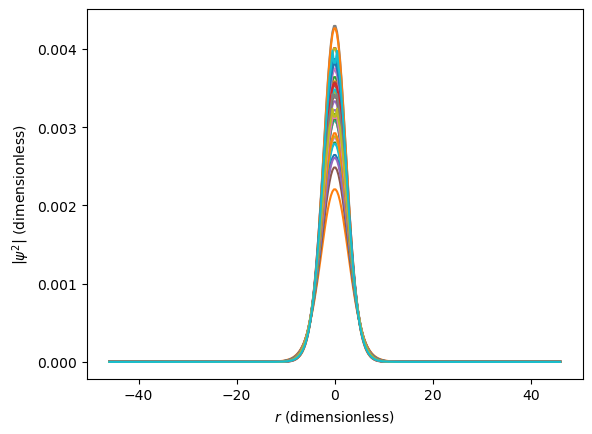

In [10]:
setupU1U2()
hello = []
ts = []
oldGM = GM
newGM = GM*1.4
for t in range(bigT):
    #Pertubation
    if(t==0):
        GM = newGM
    if(t==10):
        GM = oldGM

    print(t, t*dt, np.absolute(psi[size//2]))
    if(GM == oldGM):
        hello.append(np.absolute(psi[size//2])*np.absolute(psi[size//2]))
        ts.append(t*dt)

    setupQ()
    setupV2Grav()
    setupU1U2()
    psi = np.linalg.solve(U2, np.dot(U1,psi))

    #Regulate
    for i in range(size//2):
        psi[i] = psi[size-i-1]

    V2Grav.astype(complex)

    if t%100 == 0:
        plt.plot(x, np.absolute(psi)*np.absolute(psi))

plt.xlabel(r"$r$ (dimensionless)")
plt.ylabel(r"$\left | \psi^2 \right |$ (dimensionless)")
plt.show()

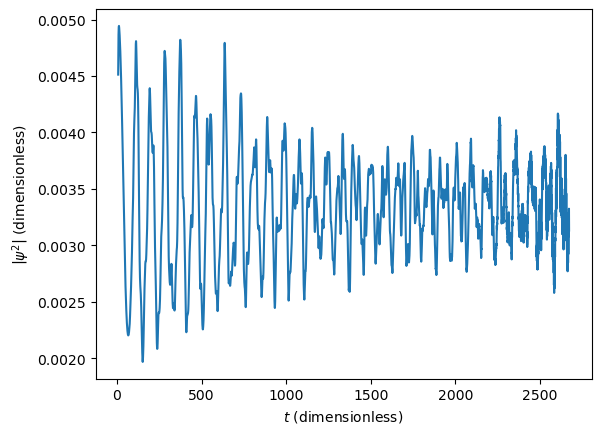

In [11]:
plt.plot(ts, hello)
plt.xlabel(r"$t$ (dimensionless)")
plt.ylabel(r"$\left | \psi^2 \right |$ (dimensionless)")
plt.show()

Text(0.5, 0, 'f (1/s)')

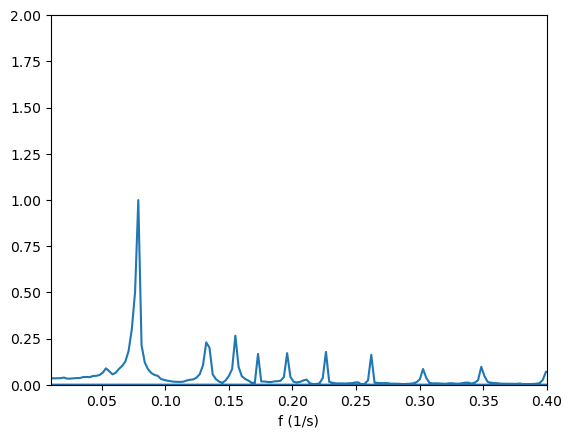

In [12]:
sp = np.fft.fft(hello)
freq = np.fft.fftfreq(len(hello), d=dt)*omegaA/5.391247e-44

plt.plot(freq, np.absolute(sp))
plt.xlim(0.01,0.4)
plt.ylim(0.0,2.0)
plt.xlabel("f (1/s)")

In [13]:
for i in range(len(freq)):
    print(freq[i], np.absolute(sp[i]))

0.0 13.317016771739146
0.002544072681704261 0.06549433531861341
0.005088145363408522 0.04783361039595247
0.007632218045112781 0.038485528509801956
0.010176290726817043 0.035546793983971606
0.012720363408521304 0.03428306814225183
0.015264436090225562 0.03512409108522116
0.017808508771929823 0.0352563751351173
0.020352581453634087 0.03879365171408813
0.022896654135338347 0.03283895242237706
0.025440726817042607 0.03322162144546627
0.027984799498746868 0.034563118635572196
0.030528872180451125 0.036032658285197736
0.03307294486215539 0.03626814846854505
0.035617017543859646 0.04169447811932491
0.03816109022556391 0.04198876884060312
0.04070516290726817 0.04092330937432442
0.04324923558897243 0.04742570278863204
0.045793308270676694 0.047904197019348234
0.04833738095238095 0.05250205933871018
0.050881453634085215 0.06497462272592792
0.05342552631578947 0.08870033358401405
0.055969598997493736 0.07356242774559062
0.05851367167919799 0.056042027623766116
0.06105774436090225 0.06457408346272

Middle
0.071-0.081			M1 (M2: 0.142-0.162, M3: 0.213-0.243, M4: 0.284-0.324, M5: 0.355-0.405)
0.132-0.137			M1?
0.158-0.163			M2
0.193-0.204			M1?
0.239-0.249			M3
0.295-0.305			M4
0.361-0.371			M5

0.076-0.086			M1
0.132-0.142			M1?
0.158-0.168			M2

Small
0.097-0.107		M1
0.163-0.173		M1?
0.214-0.224		M2
0.270-0.280		M1?
0.341-0.351		M3
0.432-0.443		M4
0.534-0.544		M5
0.651-0.661		M6

Heavy
0.031-0.037		M1
0.058-0.065		M2
0.072-0.078		M?
0.082-0.089		M?
0.099-0.167 	M3
0.116-0.123		M4
0.140-0.147		M5
0.167-0.173		M6?
0.194-0.201 	M7?